In [17]:
from numpy import exp, array, random, dot

class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1


    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalize them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))

if __name__ == "__main__":
    # Initialize a single neuron neural network.
    neural_network = NeuralNetwork()

    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)

    # The training set. We have 4 examples, each consisting of 3 input values
    # and 1 output value.
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T

    # Train the neural network using a training set.
    # Do it 10,000 times and make small adjustments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)

    print("New synaptic weights after training: ")
    print(neural_network.synaptic_weights)

    # Test the neural network with a new situation.
    print("Considering new situation [1, 0, 0] -> ?: ")
    print(neural_network.think(array([1, 0, 0])))

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Considering new situation [1, 0, 0] -> ?: 
[0.99993704]


In [6]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Define column names
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read the data set
dataset = pd.read_csv(url, names=cls)
label1 = dataset.iloc[:, 0:4].values
label2 = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
label1_train, label1_test, label2_train, label2_test = train_test_split(label1, label2, test_size = 0.2, random_state = 0)

# Feature Scaling
scaler = StandardScaler()
label1_train = scaler.fit_transform(label1_train)
label1_test = scaler.transform(label1_test)

# Logistic Regression
model = LogisticRegression(random_state = 0)
model.fit(label1_train, label2_train)
prediction = model.predict(label1_test)

# Confusion Matrix and Accuracy
matrix = confusion_matrix(label2_test, prediction)
print(matrix)
score = accuracy_score(label2_test, prediction)
print(score)

# LDA
analysis = LDA(n_components = 2)
label1_train = analysis.fit_transform(label1_train, label2_train)
label1_test = analysis.transform(label1_test)

# Logistic Regression after LDA
model = LogisticRegression(random_state = 0)
model.fit(label1_train, label2_train)
prediction = model.predict(label1_test)

# Confusion Matrix and Accuracy after LDA
matrix = confusion_matrix(label2_test, prediction)
print(matrix)
score = accuracy_score(label2_test, prediction)
print(score)

# PCA
pca = PCA(n_components = 2)
label1_train = pca.fit_transform(label1_train, label2_train)
label1_test = pca.transform(label1_test)

# Logistic Regression after PCA
model = LogisticRegression(random_state = 0)
model.fit(label1_train, label2_train)
prediction = model.predict(label1_test)

# Confusion Matrix and Accuracy after PCA
matrix = confusion_matrix(label2_test, prediction)
print(matrix)
score = accuracy_score(label2_test, prediction)
print(score)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
1.0


[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

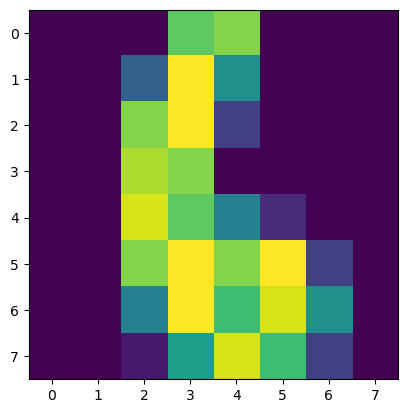

In [5]:


from sklearn import datasets
 
cancer_data = datasets.load_breast_cancer()
print(cancer_data.data[5])
print(cancer_data.data.shape) 
#target set 
print(cancer_data.target)
from sklearn.model_selection import train_test_split

cancer_data = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.4,random_state=109)
from sklearn import svm
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(X_train,y_train)
#predict the response
pred = cls.predict(X_test)
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred=pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred=pred))
print(metrics.classification_report(y_test, y_pred=pred))
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
#loading the dataset
letters = datasets.load_digits()
#generating the classifier
clf = svm.SVC(gamma=0.001, C=100)
#training the classifier
X,y = letters.data[:-10], letters.target[:-10]
clf.fit(X,y)
#predicting the output 
print(clf.predict(letters.data[:-10]))
plt.imshow(letters.images[6], interpolation='nearest')
plt.show()